In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('train_E6oV3lV.csv')
test_df =pd.read_csv('test_tweets_anuFYb8.csv')

In [3]:
pd.set_option('display.width', None)  # Auto-adjust width
pd.set_option('display.max_colwidth', None)  # No limit on column width

In [4]:
train_df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act"


In [5]:
train_df.shape

(31962, 3)

In [6]:
train_df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [7]:
train_df.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                
           max  
label           
0      31962.0  
1      31961.0

In [8]:
train_df[train_df["label"] == 0].count()

id       29720
label    29720
tweet    29720
dtype: int64

In [9]:
train_df[train_df["label"] == 0]["tweet"].iloc[2]

'  bihday your majesty'

In [10]:
len(train_df[train_df["label"] == 1])

2242

In [11]:
train_df.head(20)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno

<AxesSubplot:>

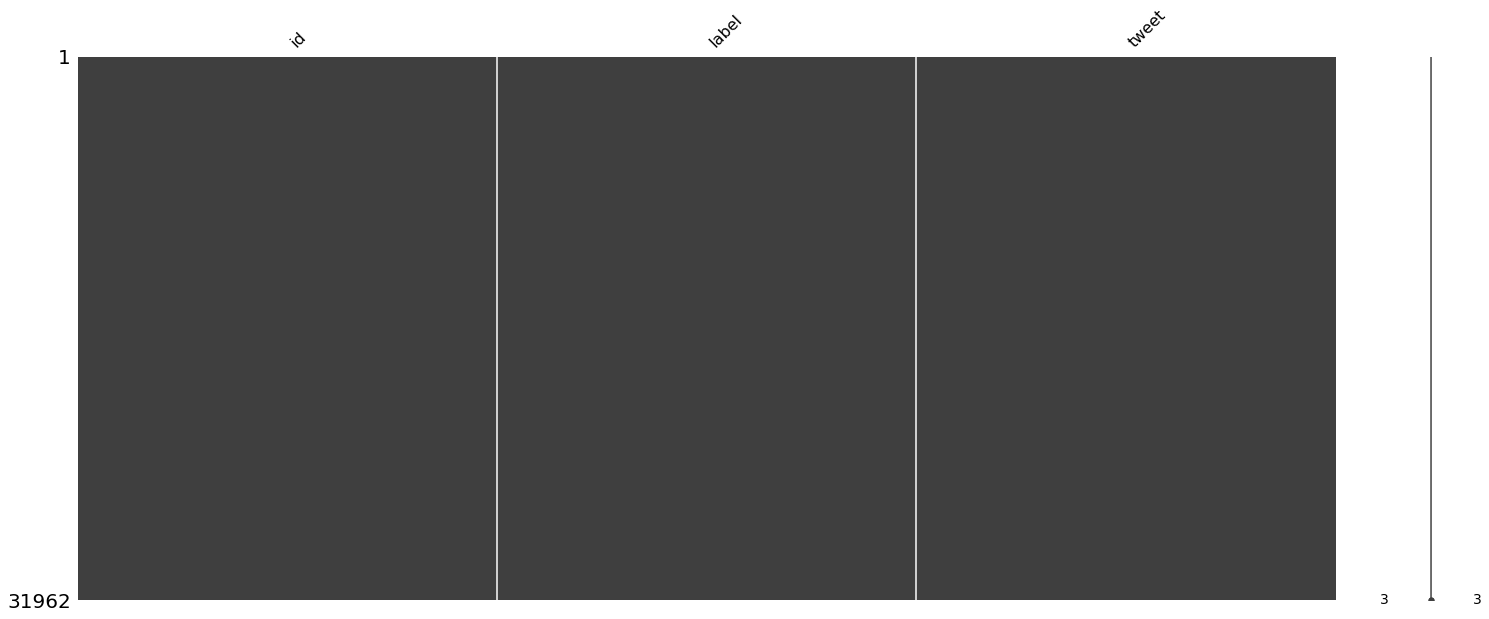

In [13]:
msno.matrix(train_df)

<AxesSubplot:>

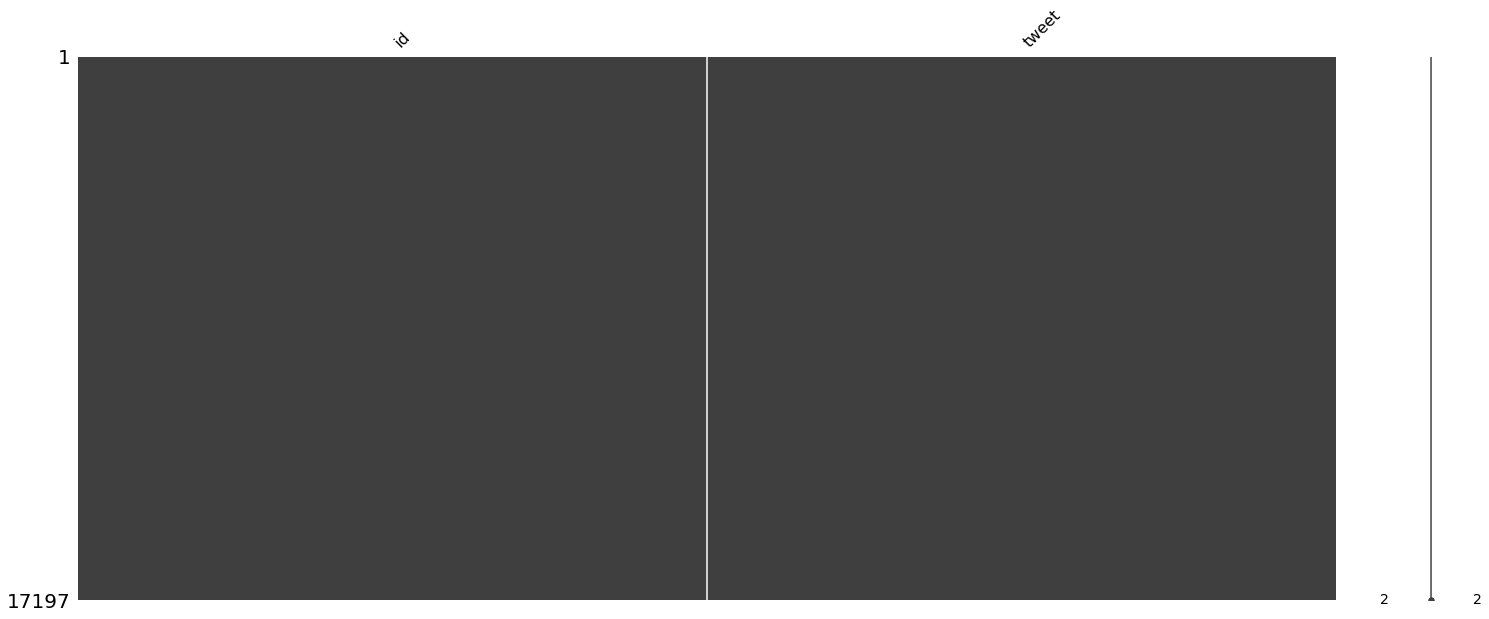

In [14]:
msno.matrix(test_df)

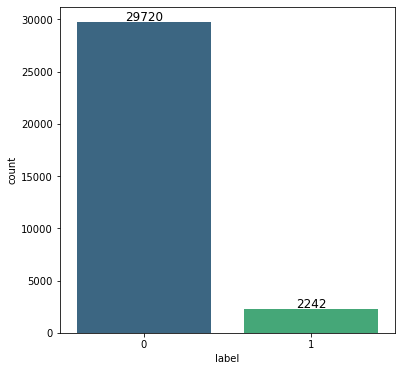

In [15]:
plt.figure(figsize=(6,6))
ax = sns.countplot(data=train_df, x="label", palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5),  # Adjust text position (optional)
                textcoords='offset points')

# Show the plot
plt.show()

## Cleansing data

In [16]:
import re

In [17]:
train_df['tweet'] = train_df['tweet'].apply(lambda x: re.sub(r'(@\w+|#\w+)', '', x).lower())

In [18]:
train_df

,id,label,tweet
0,1,0,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.
1,2,0,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.
2,3,0,bihday your majesty
3,4,0,i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now
...,...,...,...
31957,31958,0,ate isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm.
31959,31960,0,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"vandalised in in , condemns act"


In [19]:
train_df['tweet'][3]

'   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  '

In [20]:
def decode_text(text):
    try:
        
        return text.encode('latin1').decode('utf-8')
    except UnicodeDecodeError:
        
        return text

decode_text("âallâwhoâretweetsâwantânewâfollowersâ â #tfbjp â #teamfollowback â #openfollow â #followback â â # â")

'☀all☀who☀retweets☀want☀new☀followers☀ ✈ #tfbjp ✈ #teamfollowback ✈ #openfollow ✈ #followback ✈ ✈ # ✈'

In [21]:
import re

def contains_invalid_encoding(text):
    if isinstance(text, str):
        return bool(re.search(r'[^\x00-\x7F]+', text))  
    return False  

train_df['tweet'] = train_df['tweet'].astype(str)

invalid_tweets = train_df[train_df['tweet'].apply(contains_invalid_encoding)]

print(f"Tweet containing incorrect decoded characters (outside ASCII):")
print(invalid_tweets[['tweet']]) 


Những tweet chứa ký tự mã hóa sai (ngoài bảng ASCII):
                                                                                      tweet
3             i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦  
6                                                          camping tomorrow        dannyâ¦
7      the next school year is the year for exams.ð¯ can't think about that ð­         
8                                                     we won!!! love the land!!!       â¦ 
10          â  consumer price index (mom) climbed from previous 0.2% to 0.5% in may      
...                                                                                     ...
31939                                                whew  ð
 it's a productive and   !!!
31942                                                     this week is flying by    -   ¦ 
31945                                                   feel like... ðð¶ð          
31955                   

In [22]:
import re
import pandas as pd

def contains_invalid_encoding(text):
    if isinstance(text, str):
        # Looking for the characters are outside ASCII (including characters like â)
        return bool(re.search(r'[^\x00-\x7F]+', text))  
    return False

# Ensure tweets is string type
train_df['tweet'] = train_df['tweet'].astype(str)

invalid_tweets_data = []

for index, row in train_df.iterrows():
    if contains_invalid_encoding(row['tweet']):
            invalid_tweets_data.append(row)

invalid_tweets_df = pd.DataFrame(invalid_tweets_data)

print(f"DataFrame with incorrect decoded tweets:")
print(invalid_tweets_df[['tweet']])


Bảng chứa các tweet có ký tự mã hóa sai:
                                                                                      tweet
3             i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦  
6                                                          camping tomorrow        dannyâ¦
7      the next school year is the year for exams.ð¯ can't think about that ð­         
8                                                     we won!!! love the land!!!       â¦ 
10          â  consumer price index (mom) climbed from previous 0.2% to 0.5% in may      
...                                                                                     ...
31939                                                whew  ð
 it's a productive and   !!!
31942                                                     this week is flying by    -   ¦ 
31945                                                   feel like... ðð¶ð          
31955                                

In [23]:
def decode_text(text):
    try:
        return text.encode('latin1').decode('utf-8', errors='ignore')
    except UnicodeDecodeError:
        return text

def contains_invalid_encoding(text):
    if isinstance(text, str):
        return bool(re.search(r'[^\x00-\x7F]+', text))  
    return False

train_df['tweet'] = train_df['tweet'].astype(str)

train_df['decoded_tweet'] = train_df['tweet'].apply(lambda x: decode_text(x) if contains_invalid_encoding(x) else x)

invalid_tweets_after_decoding = train_df[train_df['tweet'] != train_df['decoded_tweet']]

print(f"Những tweet đã được mã hóa lại:")
print(invalid_tweets_after_decoding[['tweet', 'decoded_tweet']])

Những tweet đã được mã hóa lại:
                                                                                      tweet  \
3             i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦     
6                                                          camping tomorrow        dannyâ¦   
7      the next school year is the year for exams.ð¯ can't think about that ð­            
8                                                     we won!!! love the land!!!       â¦    
10          â  consumer price index (mom) climbed from previous 0.2% to 0.5% in may         
...                                                                                     ...   
31939                                                whew  ð
 it's a productive and   !!!   
31942                                                     this week is flying by    -   ¦    
31945                                                   feel like... ðð¶ð             
31955           

In [36]:
train_df.head(20)

,id,label,tweet,decoded_tweet,clean_duplicate
0,1,0,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.
1,2,0,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦,i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦
4,5,0,factsguide: society now,factsguide: society now,factsguide: society now
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there.,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there.,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there.
6,7,0,camping tomorrow dannyâ¦,camping tomorrow danny…,camping tomorrow danny…
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­,the next school year is the year for exams.😯 can't think about that 😭,the next school year is the year for exams.😯 can't think about that 😭
8,9,0,we won!!! love the land!!! â¦,we won!!! love the land!!! …,we won!!! love the land!!! …
9,10,0,welcome here ! i'm it's so !,welcome here ! i'm it's so !,welcome here ! i'm it's so !


In [25]:
repeated_char_train = []
for i, tweet in enumerate(train_df['decoded_tweet']):
  if re.match(r'\w*(\w)\1+',tweet):
    repeated_char_train.append(i)

In [26]:
len(repeated_char_train)

2893

In [27]:
#Repeated char function 
def repeated_char(text):
  text = re.sub(r'(\w)\1{2,}',r'\1',text)
  return text

In [28]:
new_train_df = train_df

In [29]:
new_train_df['clean_duplicate'] = new_train_df['decoded_tweet'].apply(repeated_char)

In [30]:
new_train_df.head()

,id,label,tweet,decoded_tweet,clean_duplicate
0,1,0,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.
1,2,0,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦,i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦
4,5,0,factsguide: society now,factsguide: society now,factsguide: society now


In [33]:
!pip install transformers

  Attempting uninstall: fsspec
    Found existing installation: fsspec 2021.10.1
    Uninstalling fsspec-2021.10.1:
      Successfully uninstalled fsspec-2021.10.1


In [38]:
from transformers import BertTokenizer, AutoTokenizer, AutoModelForSequenceClassification

In [37]:
new_train_df.head(20)

,id,label,tweet,decoded_tweet,clean_duplicate
0,1,0,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.
1,2,0,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.,thanks for credit i can't use cause they don't offer wheelchair vans in pdx.
2,3,0,bihday your majesty,bihday your majesty,bihday your majesty
3,4,0,i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦,i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦
4,5,0,factsguide: society now,factsguide: society now,factsguide: society now
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there.,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there.,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there.
6,7,0,camping tomorrow dannyâ¦,camping tomorrow danny…,camping tomorrow danny…
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­,the next school year is the year for exams.😯 can't think about that 😭,the next school year is the year for exams.😯 can't think about that 😭
8,9,0,we won!!! love the land!!! â¦,we won!!! love the land!!! …,we won!!! love the land!!! …
9,10,0,welcome here ! i'm it's so !,welcome here ! i'm it's so !,welcome here ! i'm it's so !
